In [1]:
import pm4py
import pandas as pd

In [2]:
filename = ('SampleData.csv')

In [5]:
data = pd.read_csv(filename)

## Read Dataset in pm4py

In pm4py the dataset is called "log"

In [9]:
log = pm4py.format_dataframe(data, 
                              case_id='CaseId', 
                              activity_key='ActivityName', 
                              timestamp_key='EndTimestamp', 
                              start_timestamp_key='StartTimestamp', 
                              timest_format='%Y-%m-%d %H:%M:%S%z')

In [10]:
# Discover starting and ending activities
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)

In [11]:
start_activities

{'Invoice Entry': 133}

In [12]:
end_activities

{'Re-issuing the invoice': 133}

In [ ]:
# # the log is filtered on the top 5 variants - it keeps only data for top x variants
# filtered_log = pm4py.filter_variants_top_k(data, 5)

# Visualise the process
### Comparing process discovery algorithms
#### Alpha Miner
Alpha Miner was perhaps the first process discovery algorithm. Most of the algorithms subsequently developed were refinements and embellishments on it (Van der Aalst, 2016). Its main limitation is that it does not take into account event frequencies and does not guarantee soundness (see above). It also only really works for event logs without noise, which is rarely the case in real world data.

#### Heuristic Miner
Heuristics Miner (Weijters; Bogarin et al., 2016) takes into account event frequencies and ignores exceptional behaviour (low frequency events and event sequences), single events, and short loops (which you can see as self-contained events at a higher level). However, like alpha miner, it does not guarantee soundness.

Heuristics miner is most suitable when the number of event types is small (can fit in a human brain). By ignoring exceptional low frequency events and event sequences, it allows you to infer a parsimonious model from noisy real-world data.

#### Inductive Miner
Like heuristics miner, inductive miner takes into account event frequencies and ignores low-frequency events and isolated events/event loops. As an improvement to both alpha miner and heuristics miner, it also, guarantees soundness.

### Alpha miner Algorythm and petri_net visualisation (not preferred)

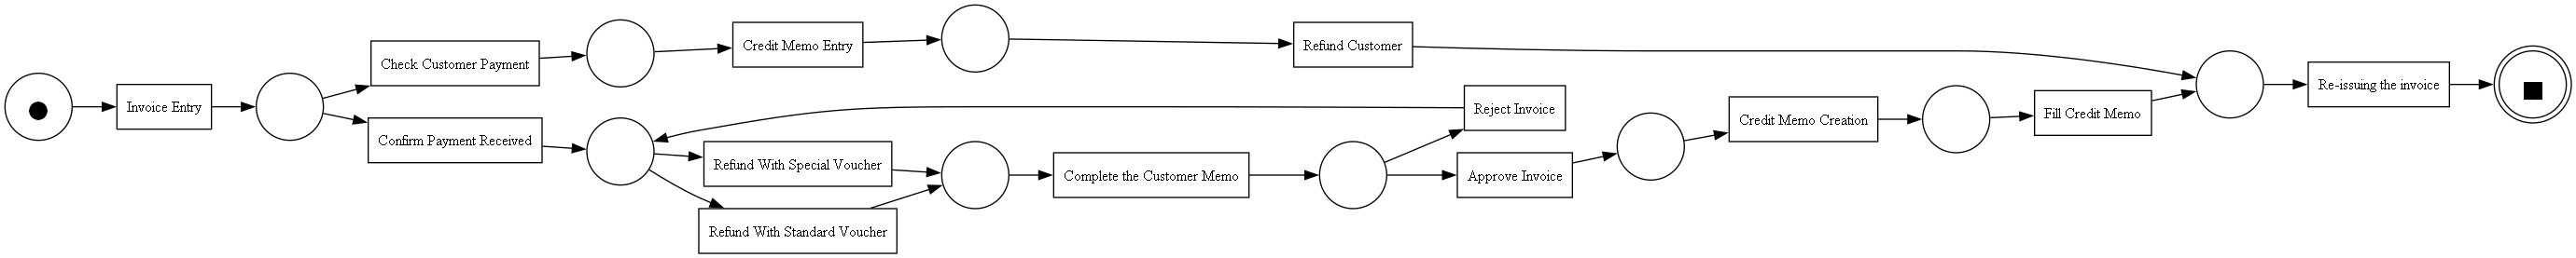

In [14]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log)

## Import the petrinet visualizer object
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

### heuristics miner Algorythm and heuristics net visualisation (not preferred)

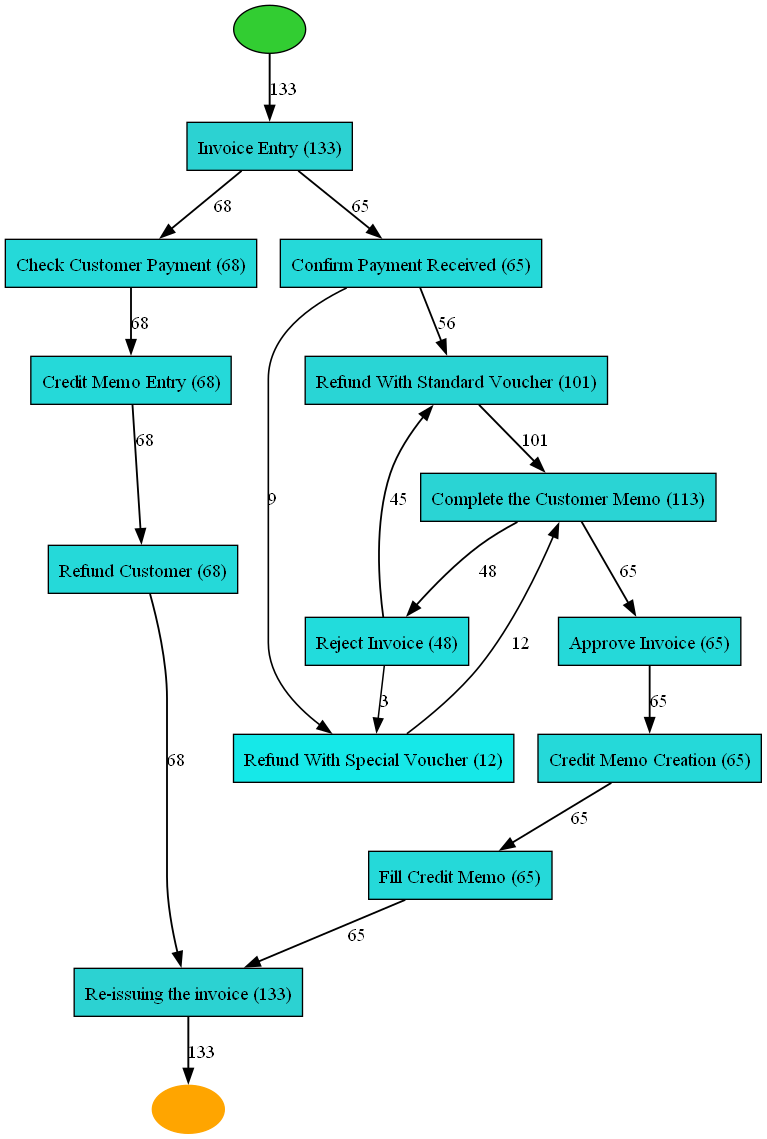

In [15]:
## Import heuristics miner algorithm
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# Import the heuristics net visualisation object
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# Visualise model
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

## Inductive miner and Process Tree visualisation

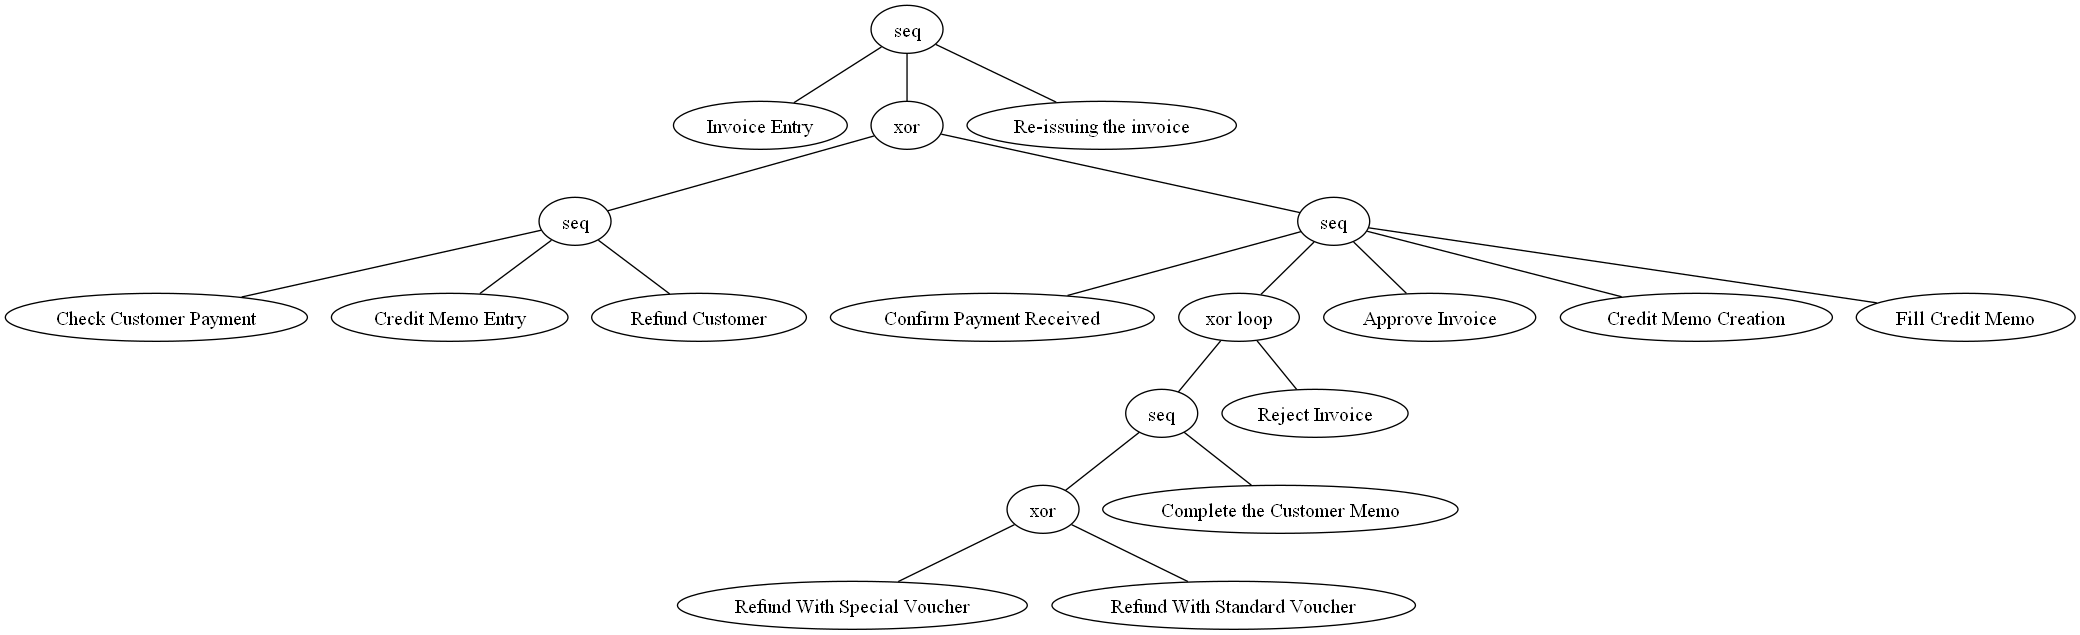

In [16]:
# Discover process tree using inductive miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# Discover process tree using inductive miner
tree = inductive_miner.apply_tree(data)

from pm4py.visualization.process_tree import visualizer as pt_visualizer
# Visualise the tree
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

## Directly Follow Diagram (dfg) discovery algorithm (Preferred)

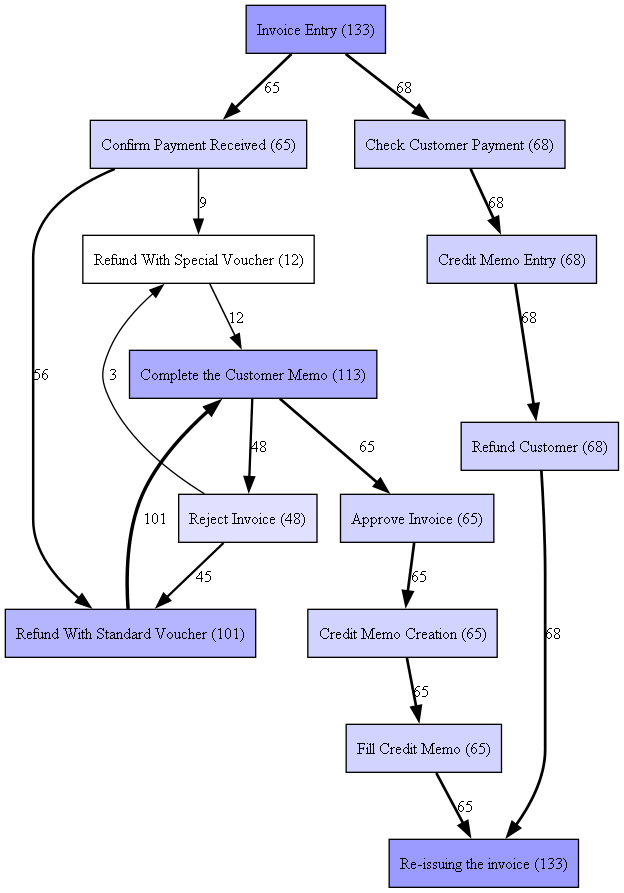

In [17]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization

#Create graph from log
dfg = dfg_discovery.apply(log)

# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

## Different view using resources

### I'll replace the acitivities for Roles to get a different view

In [24]:
log = pm4py.format_dataframe(data, 
                              case_id='CaseId', 
                              activity_key='Role', 
                              timestamp_key='EndTimestamp', 
                              start_timestamp_key='StartTimestamp', 
                              timest_format='%Y-%m-%d %H:%M:%S%z')

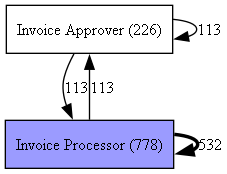

In [25]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization

#Create graph from log
dfg = dfg_discovery.apply(log)

# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-4-912286ee51b

  
Resource networks and process robustness
As well as the distribution of resources between events, it might also in many instances be important to determine how resources are associated with each other (if at all) in a process or across processes.

You can use pm4py in conjunction with networkx to conduct social network analysis and visualisation of the resource ‘handovers’ (when resources follow each other) from the logs. See also this guide to using pm4py to analyse social networks

In [37]:
from pm4py.visualization.sna import visualizer as sna_vis
from pm4py.algo.enhancement.sna import factory as sna_factory
## networkx is a library for social network analysis
import networkx as nx
## Create the handover network using the log
handover_nw = sna_factory.log_handover.apply(data)
## Generate the network visualisation
gviz_hw_py = sna_vis.networkx.apply(handover_nw)
## Display the network
sna_vis.networkx.view(gviz_hw_py)

C:\Users\peter\anaconda3\lib\site-packages\pm4py\algo\enhancement\__init__.py:21: UserWarning: pm4py.algo.enhancement is deprecated. please use pm4py.algo.decision_mining, pm4py.algo.comparison and pm4py.algo.organizational_mining instead
  warnings.warn(


ImportError: cannot import name 'factory' from 'pm4py.algo.enhancement.sna' (C:\Users\peter\anaconda3\lib\site-packages\pm4py\algo\enhancement\sna\__init__.py)

In [20]:
# a directly -follows graph (DFG) is discovered from the log
dfg, start_activities , end_activities = pm4py.discover_dfg(filtered_log)

C:\Users\peter\anaconda3\lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


In [21]:
# a process tree is discovered using the inductive miner
process_tree = pm4py.discover_process_tree_inductive(filtered_log)

In [22]:
# the process tree is converted to an accepting Petri net
petri_net , initial_marking , final_marking = pm4py.convert_to_petri_net(process_tree)
process_tree = pm4py.discover_process_tree_inductive(filtered_log)

In [23]:

# the accepting Petri net is converted to a BPMN diagram
bpmn_diagram = pm4py.convert_to_bpmn(petri_net , initial_marking , final_marking)

In [24]:
# the discovered process models are shown on the screen as .svg images
pm4py.view_dfg(dfg, start_activities , end_activities , format=’svg’)
pm4py.view_process_tree(process_tree , format=’svg’)
pm4py.view_petri_net(petri_net , initial_marking , final_marking , format=’svg’)
pm4py.view_bpmn(bpmn_diagram , format=’svg’)

SyntaxError: invalid character in identifier (<ipython-input-24-b03b516e188f>, line 2)

In [26]:
# we compare the original log versus the discovered model
fitness = pm4py.fitness_token_based_replay(data, petri_net , initial_marking , final_marking)
precision = pm4py.precision_token_based_replay(data, petri_net , initial_marking , final_marking)

print(fitness) # 0.984
print(precision) # 0.758

# we check if the discovered model is a sound workflow net
is_sound_wfnet = pm4py.check_soundness(petri_net , initial_marking , final_marking)[0]
print(is_sound_wfnet) # True

replaying log with TBR, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/57 [00:00<?, ?it/s]

{'perc_fit_traces': 98.49624060150376, 'average_trace_fitness': 0.9989974937343359, 'log_fitness': 0.9979619565217391, 'percentage_of_fitting_traces': 98.49624060150376}
0.6844891476971943
Input is ok.
Petri Net is a workflow net.
Every place is covered by s-components.
There are no dead tasks.
All tasks are live.


TypeError: 'bool' object is not subscriptable